# 一、项目名称：实习僧网站“运营”岗位的数据分析及可视化

# 二、项目摘要：  
    该项目抓取了2019年7月6日实习僧网站“运营”岗位数据5000条，对数据进行清洗、整理和分析，最后通过Pandas和Matplotlib实现数据可视化。该项目旨在分析全国范围内“运营”实习岗的数量和地理分布、学历要求、平均日薪和实习期长度。通过对分析具体职位要求，提炼出“运营”岗位核心的任职要求，帮助学生明确求职所要具备的能力。

# 三、引言：  
    前不久在找运营相关实习，浏览了许多招聘信息，还是没有对该岗位形成全面具体的认识。想到这学期学了Python课，希望通过数据挖掘和分析，系统性地认识运营岗位，理清求职方向。

# 四、研究思路：  
    项目研究思路总共分为三步，每一步骤可以再细分。具体思路如下所示：  
    STEP 1 : 抓取数据  
        该部分从实习僧网站上抓取了5000条运营岗位信息的“页面url、职位名称、实习日薪、实习城市、学历要求、每周实习天数、实习期、职位描述”8个要素，数据存储于'shixiseng_find_intern_list20190706.txt'。
    STEP 2 : 数据清洗  
        这一部分对数据缺失值进行清洗。
    STEP 3 : 数据分析&可视化   
        该部分对数据进行逐条分析和交叉分析，“研究结论”紧跟分析，在“五、总结”部分再进行汇总。  
        该部分共分析了7个问题：  
        1. 运营的平均实习日薪是多少？  
        2. 哪个城市的实习机会更多？  
        3. 实习对学历的要求是怎样的？  
        4. 平均日薪与实习城市有无关系？  
        5. 平均日薪与学历有无关系？  
        6. 实习一般要求多长时间？  
        7. 任职要求词云图与词频统计    
    下面我们开始正式抓取并分析数据，Let's get it.

【实习僧网站数字反爬】  
    实习僧网站采用了字体加密，在整个数据抓取过程中，最为关键的信息，如实习薪资、每周实习天数和实习期会碰到数字无法抓取的情况。需要进行字体解密，根据观察，发现映射字典是mapping = {'\uf822': '0', '\ue2b6': '1', '\ue66e': '2', '\uefb4': '3', '\ueb54': '4','\uf5ed': '5', '\uf7e3': '6', '\ue7c1': '7', '\uef2d': '8', '\uf2a3': '9'}。  
    以上是2019-07-06实习僧字体加密映射字典，该网站隔一段时间就会换一次加密，因此下次爬取信息需要寻找新的映射关系。

## STEP 1 : 抓取数据

In [1]:
# 代码显示多行
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

1. 对url进行分析：   
打开网址 https://www.shixiseng.com/  
输入关键词“运营”，搜索得 https://www.shixiseng.com/interns/st-intern_?k=运营&p=1  
通过返回的页面，可以发现关键参数是 k 和 p，通过这两个关键参数的设置，可以遍历所有的page页

In [2]:
# 打开网址 https://www.shixiseng.com/
# 输入关键词“运营”，搜索得 https://www.shixiseng.com/interns/st-intern_?k=运营&p=1
# 通过返回的页面，可以发现关键参数是 k 和 p，通过这两个关键参数的设置，可以遍历所有的page页
from IPython.display import display_html, HTML
HTML('<iframe src=https://www.shixiseng.com/interns/st-intern_?k=%E8%BF%90%E8%90%A5&p=1 width=1000 height=500></iframe>')

2. 先抓取page_num=1页面所有的职位信息  
可以发现职位名称在class="position-name"路径下，一个职位记为一个item，发现一页共有10个items

In [3]:
# 先抓取所有运营岗位的基本信息
import requests
from bs4 import BeautifulSoup
page_num=1
page_num=str(page_num) #注：int无法直接与str拼接，要转化成str才能实现url拼接
base_url="https://www.shixiseng.com/interns/st-intern_?k=运营&p="
base_url_1=base_url+page_num
print(base_url_1)
content=requests.get(base_url_1).text
soup=BeautifulSoup(content, "lxml")
# 职位名称和具体路径在('a', {'class', "position-name"})
items=soup.find_all('a', {'class','position-name'})

https://www.shixiseng.com/interns/st-intern_?k=运营&p=1


In [4]:
# 一页中的职位信息
items
len(items)

[<a class="position-name" href="/intern/inn_cxtyl5u2jejf" target="_blank">公主坟房产置业储备店经理</a>,
 <a class="position-name" href="/intern/inn_ygl9nxca6aqq" target="_blank">往届运营实习管培</a>,
 <a class="position-name" href="/intern/inn_52ad4ffqxh4s" target="_blank">商品运营（英文站）</a>,
 <a class="position-name" href="/intern/inn_uhyizpgmdjcc" target="_blank">海淀学区房运营岗位</a>,
 <a class="position-name" href="/intern/inn_gc3u0mj7e0jz" target="_blank">链家运营置业经纪</a>,
 <a class="position-name" href="/intern/inn_busm2en7zun3" target="_blank">搜索引擎优化专员</a>,
 <a class="position-name" href="/intern/inn_f5rflym6lktf" target="_blank">专业资料编辑助理</a>,
 <a class="position-name" href="/intern/inn_iw5qkeiz81hj" target="_blank">类资料编辑实习</a>,
 <a class="position-name" href="/intern/inn_uhuiqck0ydhw" target="_blank">无机化学教辅编辑</a>,
 <a class="position-name" href="/intern/inn_bd9pvqxohno1" target="_blank">专业资料整理编辑</a>]

10

3. 通过观察可以发现具体职位信息界面的链接在 href 中，找到规律

In [5]:
# 提取第一个职位具体路径
items[0].get('href')

'/intern/inn_cxtyl5u2jejf'

In [6]:
# 生成具体职位页面url
base_url_2="https://www.shixiseng.com"
detail_url=base_url_2+items[0].get('href')
print(detail_url)

https://www.shixiseng.com/intern/inn_cxtyl5u2jejf


4. 进入具体职位信息界面，找到“职位名称、实习日薪、实习城市、学历要求、每周实习天数、实习期、职位描述”这7个要素

In [7]:
# 进入职位具体页面，获取所需信息：职位名称、实习日薪、实习城市、学历要求、每周实习天数、实习期、职位描述
# 通过观察发现，职位名称在<div class="new_job_name" title="链家运营管培生">
content=requests.get(detail_url).text
soup=BeautifulSoup(content, "lxml")
new_job_name=soup.find_all('div',{'class','new_job_name'})
job_name=new_job_name[0].get('title')
job_name

'公主坟房产置业储备店经理'

In [8]:
# 获取其他实习信息
job_msg=soup.find_all('div', {'class','job_msg'})
job_msg
# 出现问题：无法抓取数字！！！
# 先试试抓取日薪 （/天）
job_money_set=soup.find_all('span', {'class','job_money cutom_font'})
job_money_str=str(job_money_set)
job_money=job_money_str[36:-10]
job_money
# 可以看到，日薪显示为“\uf76e\uf4fc\uf4fc-\uf105\uf4fc\uf4fc”
# 搜索后发现，这是因为实习僧使用了自定义的字体，开始百度解决方法……
# mapping = {'&#xe66f': '0', '&#xe50e': '1', '&#xf19c': '2', '&#xe2d1': '3', '&#xe372': '4',
          # '&#xeb5a': '5', '&#xf37c': '6', '&#xf8b6': '7', '&#xf252': '8', '&#xf3a0': '9'}  # 映射字典，来源https://github.com/Alfred1984/interesting-python/blob/master/shixiseng/font_decode.py
# but,实习僧的映射好像是每天更新的！！！
# 先放到一边，等抓取完数据再想办法解开映射

[<div class="job_msg"><span class="job_money cutom_font">-/天</span><span class="job_position" title="北京">北京</span><span class="job_academic">本科</span><span class="job_week cutom_font">天／周</span><span class="job_time cutom_font">实习个月</span></div>]

'\ue66e\uf5ed\uf822-\uf5ed\uf822\uf822'

In [9]:
# 实习城市
job_position=soup.find_all('span', {'class','job_position'})[0].get("title")
job_position
# 学历要求
job_academic_set=soup.find_all('span', {'class','job_academic'})
job_academic_str=str(job_academic_set)
job_academic=job_academic_str[28:-8]
job_academic
# 每周实习天数（/周）
job_week_set=soup.find_all('span', {'class','job_week cutom_font'})
job_week_str=str(job_week_set)
job_week=job_week_str[35:-11]
job_week
# 实习期(/月)
job_time_set=soup.find_all('span', {'class','job_time cutom_font'})[0]
job_time_str=str(job_time_set)
job_time=job_time_str[36:-9]
job_time

'北京'

'本科'

'\uf7e3'

'\ue2b6\ue66e'

In [10]:
# 职位描述
job_detail=soup.find('div', {'class','job_detail'}).text.strip().replace('\n','').replace('\t','')
job_detail
#print(job_detail.replace('\n',''))

'【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Offline线下门店 为客户提供优质的看房体验3.促成买卖双方交易达成，协助双方合同签署、办理权属转移等工作\xa0【任职要求】1.国家统招本科及以上学历，专业不限；2.有互联网思维，会深度使用APP；有为客户打理百万资产的理财意识。3.强烈的成就欲望，学习能力、抗压能力佳，不怕困难，不惧挫折；4.阳光，踏实，有梦想，愿意通过自己的努力付出，实现个人价值；5.高度的工作热情和团队合作意识，有销售、客户服务或学生社团干部经验者优先考虑；6.沟通能力强，普通话标准；有亲和力，工作积极，乐观开朗。【薪资待遇】1、试用期无责任高额底薪5000元/月，转正后超高提成30%-75%，入职新人平均工资6000-10000元/月；2、提供员工住宿房源， 需要员工自行承担约1000元 人/月；3、实习期缴纳实习生意外伤害险，转正后统一购买五险一金+商业保险（补充医疗、意外伤害）；4、国家传统节日发放丰厚物资福利，带薪年假及公休假，内部员工租房、购房优惠；月度聚餐及周边游；开单赢大奖免费出国游，年度精英社奖金奖品加免费出国游，迎亲情带家人在人民大会堂奖励大会及国宴；5、实习期员工可以享受最长3个月的论文答辩假（2月—6月）。我们的企业服务理念：我承诺，我做到\xa0我们的核心价值观：诚实守信、客户至上、团队作战、拼搏进取【加入链家】培训：（每个人入职后都有师傅）1. 入职前：新人训（为期4.5天的专业知识培训和素质拓展训练，让你对房产业务知识有一个基本的认识）2. 入职一个月：衔接训（签约中的法律知识、业务实战、谈判技巧等）3. 入职三个月：专业知识提升训练招聘店面位置：北京市海淀区八宝庄40号楼1层107链家底墒， 店面距离地铁10号线西钓鱼台站C口1100米，距离数据来源高德地图 我携手店面12位伙伴期待您的到来，加入我们团队，责任盘联动盘2018年100+的成交，期待我们一起成长，一起突破！我是链家商圈经理李帅，我在链家，我在等你！'

5. 实习僧最多显示500页职位信息，下面开始正式抓取，数据保存到'shixiseng_find_intern_list20190706.txt'

In [23]:
# 已经得知所有需要信息的抓取方式
# 接下来进行所有运营岗位的抓取：职位名称、实习日薪、实习城市、学历要求、每周实习天数、实习期、职位描述
# 将所有信息保存到txt文件中
def crawler(page_num, file_name):
    try:
        # 打开浏览器
        url="https://www.shixiseng.com/interns/st-intern_?k=运营&p=%s" %page_num  # %d 会出问题：incomplete format，换成 %s
        content=requests.get(url).text
        soup=BeautifulSoup(content, "lxml")
        items=soup.find_all('a', {'class','position-name'})
        
        
        for i in items:
            # 获取具体信息页面
            href=i.get('href')
            url_1="https://www.shixiseng.com"
            detail_url=url_1+href
            content=requests.get(detail_url).text
            soup=BeautifulSoup(content, "lxml")
            # 职位名称
            new_job_name=soup.find_all('div',{'class','new_job_name'})
            job_name=new_job_name[0].get('title')
            # 实习日薪
            job_money_set=soup.find_all('span', {'class','job_money cutom_font'})
            job_money_str=str(job_money_set)
            job_money=job_money_str[36:-10].replace('\uf822','0').replace('\ue2b6','1').replace('\ue66e','2').replace('\uefb4','3').replace('\ueb54','4').replace('\uf5ed','5').replace('\uf7e3','6').replace('\ue7c1','7').replace('\uef2d','8').replace('\uf2a3','9')
            # 实习城市
            job_position=soup.find_all('span', {'class','job_position'})[0].get("title")
            # 学历要求
            job_academic_set=soup.find_all('span', {'class','job_academic'})
            job_academic_str=str(job_academic_set)
            job_academic=job_academic_str[28:-8]
            # 每周实习天数
            job_week_set=soup.find_all('span', {'class','job_week cutom_font'})
            job_week_str=str(job_week_set)
            job_week=job_week_str[35:-11].replace('\uf822','0').replace('\ue2b6','1').replace('\ue66e','2').replace('\uefb4','3').replace('\ueb54','4').replace('\uf5ed','5').replace('\uf7e3','6').replace('\ue7c1','7').replace('\uef2d','8').replace('\uf2a3','9')
            # 实习期
            job_time_set=soup.find_all('span', {'class','job_time cutom_font'})[0]
            job_time_str=str(job_time_set)
            job_time=job_time_str[36:-9].replace('\uf822','0').replace('\ue2b6','1').replace('\ue66e','2').replace('\uefb4','3').replace('\ueb54','4').replace('\uf5ed','5').replace('\uf7e3','6').replace('\ue7c1','7').replace('\uef2d','8').replace('\uf2a3','9')
            # 职位描述
            job_detail=soup.find('div', {'class','job_detail'}).text.strip().replace('\n','').replace('\t','')
            
            
            record=detail_url + '\t' + job_name + '\t' + job_money + '\t' + job_position + '\t'+ \
                        job_academic + '\t' + job_week + '\t'  + job_time + '\t' + job_detail
        
            
            with open (file_name, 'a',encoding='gb18030') as p:
                p.write(record+'\n')
        
    except Exception as e:
        print(e)
        pass

In [24]:
# 抓取所有网页,观察得知，实习僧最多显示500页
for page_num in range(501):
    print(page_num)
    crawler(page_num,'shixiseng_find_intern_list20190706.txt')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [2]:
# 以csv格式读取
import pandas as pd

df = pd.read_csv('shixiseng_find_intern_list20190706.txt',
                 sep = "\t",  lineterminator='\n', names = ['detail_url', 'job_name', 'job_money', 
                 'job_position', 'job_academic', 'job_week', 'job_time', 'job_detail'], encoding='gb18030') 
# 这里如果不加 encoding='gb18030' 的话，会出现不能解码的问题
# 如果不加 lineterminator='\n' 的话，会报错“Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.”
df[:5] 

,detail_url,job_name,job_money,job_position,job_academic,job_week,job_time,job_detail
0,https://www.shixiseng.com/intern/inn_cxtyl5u2jejf,公主坟房产置业储备店经理,250-500,北京,本科,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...
1,https://www.shixiseng.com/intern/inn_ygl9nxca6aqq,往届生运营实习管培生,300-500,北京,本科,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...
2,https://www.shixiseng.com/intern/inn_52ad4ffqxh4s,商品运营（英文站）,150-200,北京,本科,5,9,1、 主要负责平台（英文站）商品的引入、管理、优化。2、 吸取竞品网站优点，从商品维度改善网...
3,https://www.shixiseng.com/intern/inn_uhyizpgmdjcc,海淀学区房运营岗位,200-250,北京,本科,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...
4,https://www.shixiseng.com/intern/inn_gc3u0mj7e0jz,链家运营置业经纪人,200-250,北京,不限,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...


## STEP 2 : 数据清洗

In [2]:
count=len(open(r"shixiseng_find_intern_list20190706.txt",'rU', encoding='gb18030').readlines())
print(count)

5336


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


1. 501页，每页10条数据，理应抓到5010条数据（其中第0页和第1页数据重复，需要去重），现在一共抓取了5336条，说明有326条数据多出（不知道原因）。因此接下来先对数据进行去重。

In [2]:
import pandas as pd

df = pd.read_csv('shixiseng_find_intern_list20190706.txt',
                 sep = "\t",  lineterminator='\n', names = ['detail_url', 'job_name', 'job_money', 
                 'job_position', 'job_academic', 'job_week', 'job_time', 'job_detail'], encoding='gb18030') 

newDf = df.drop_duplicates(['detail_url'], 'last') #去重，意为“detail_url”相同的，保留最后一条数据
newDf[:5]
len(newDf)
newDf.info()

,detail_url,job_name,job_money,job_position,job_academic,job_week,job_time,job_detail
10,https://www.shixiseng.com/intern/inn_cxtyl5u2jejf,公主坟房产置业储备店经理,250-500,北京,本科,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...
11,https://www.shixiseng.com/intern/inn_ygl9nxca6aqq,往届生运营实习管培生,300-500,北京,本科,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...
12,https://www.shixiseng.com/intern/inn_52ad4ffqxh4s,商品运营（英文站）,150-200,北京,本科,5,9,1、 主要负责平台（英文站）商品的引入、管理、优化。2、 吸取竞品网站优点，从商品维度改善网...
13,https://www.shixiseng.com/intern/inn_uhyizpgmdjcc,海淀学区房运营岗位,200-250,北京,本科,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...
14,https://www.shixiseng.com/intern/inn_gc3u0mj7e0jz,链家运营置业经纪人,200-250,北京,不限,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...


4960

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4960 entries, 10 to 5009
Data columns (total 8 columns):
detail_url      4960 non-null object
job_name        4960 non-null object
job_money       4784 non-null object
job_position    4960 non-null object
job_academic    4960 non-null object
job_week        4960 non-null int64
job_time        4960 non-null int64
job_detail      4960 non-null object
dtypes: int64(2), object(6)
memory usage: 348.8+ KB


2. 去重处理后数据变为4960条，实习日薪数据有176个空值，为了方便分析，下面开始进一步数据清洗：（1）删除带空值的行；（2）将实习薪资拆成bottom，top，average三列

In [3]:
# 删除带空值的行
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy import nan as NaN

newDf.dropna(axis=0, how='any', inplace=True)

newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4784 entries, 10 to 5009
Data columns (total 8 columns):
detail_url      4784 non-null object
job_name        4784 non-null object
job_money       4784 non-null object
job_position    4784 non-null object
job_academic    4784 non-null object
job_week        4784 non-null int64
job_time        4784 non-null int64
job_detail      4784 non-null object
dtypes: int64(2), object(6)
memory usage: 336.4+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
# 将实习薪资拆成bottom，top，average三列

newDf['bottom'] = newDf['top'] = newDf['average'] = newDf['job_money']

for i in range(len(newDf['job_money'])):
    item = newDf['job_money'].iloc[i].split('-')
    newDf['bottom'].iloc[i]=item[0]
    newDf['top'].iloc[i]=item[1]
    newDf['average'].iloc[i]= str((int(item[0])+int(item[1]))/2)

newDf[:3]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

,detail_url,job_name,job_money,job_position,job_academic,job_week,job_time,job_detail,bottom,top,average
10,https://www.shixiseng.com/intern/inn_cxtyl5u2jejf,公主坟房产置业储备店经理,250-500,北京,本科,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...,250,500,375.0
11,https://www.shixiseng.com/intern/inn_ygl9nxca6aqq,往届生运营实习管培生,300-500,北京,本科,6,12,【工作职责】1.负责线上Online渠道链家网的房产信息维护推广，打造个人的专业品牌2.Of...,300,500,400.0
12,https://www.shixiseng.com/intern/inn_52ad4ffqxh4s,商品运营（英文站）,150-200,北京,本科,5,9,1、 主要负责平台（英文站）商品的引入、管理、优化。2、 吸取竞品网站优点，从商品维度改善网...,150,200,175.0


In [5]:
# 把newDf存为csv，方便以后直接取用
newDf.to_csv("newDf.csv", index=False, columns = ['detail_url', 'job_name', 'job_money', 
                 'job_position', 'job_academic', 'job_week', 'job_time', 'job_detail','bottom', 'top', 'average'], encoding='gb18030')

In [6]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4784 entries, 10 to 5009
Data columns (total 11 columns):
detail_url      4784 non-null object
job_name        4784 non-null object
job_money       4784 non-null object
job_position    4784 non-null object
job_academic    4784 non-null object
job_week        4784 non-null int64
job_time        4784 non-null int64
job_detail      4784 non-null object
bottom          4784 non-null object
top             4784 non-null object
average         4784 non-null object
dtypes: int64(2), object(9)
memory usage: 448.5+ KB


## STEP 3 : 数据分析&可视化

职位描述之后会用python分词做词云图，所以目前筛选出“实习日薪”、“实习城市”、“学历要求”、“每周实习天数”、“实习期”这五个标签，这些标签可以两两组合做出各种交叉分析。  
通过分析我们想要解决以下疑惑：（1）运营的平均实习日薪是多少？（2）哪个城市的实习机会更多？（3）实习对学历的要求是怎样的？（4）平均日薪与实习城市、学历有无关系？（5）实习一般要求多长时间？……

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

1. 运营实习生的平均日薪

In [82]:
newDf['average'].value_counts()[:10]

125.0    1761
175.0     684
150.0     356
135.0     312
110.0     244
75.0      242
100.0     194
90.0      137
225.0     127
160.0      88
Name: average, dtype: int64

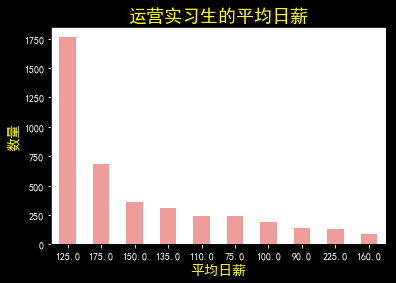

In [87]:
fig0 = plt.figure(0,facecolor = 'black') 
plt.tick_params(colors='white')#设置轴的颜色为白色
newDf['average'].value_counts()[:10].plot(kind='bar',rot=0,color='#ef9d9a')#画直方图图

# 设置图标题，x和y轴标题
title = plt.title('运营实习生的平均日薪',fontsize=18,color='yellow')# 设置标题
xlabel = plt.xlabel('平均日薪',fontsize=14,color='yellow')# 设置X轴轴标题
ylabel = plt.ylabel('数量',fontsize=14,color='yellow')# 设置Y轴轴标题

【研究结论】通过分析，可以发现，运营实习生的平均日薪集中在110-175元/天。125元/天的实习日薪占30%左右。

2. 城市职位数量及分布

In [62]:
# 先看一下前10的城市分布
newDf['job_position'].value_counts()[:10]
list_1=newDf['job_position'].value_counts()[:20]

北京    1628
上海     849
广州     490
杭州     276
成都     272
深圳     272
武汉     155
南京      66
天津      50
西安      50
Name: job_position, dtype: int64

In [7]:
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

Text(-0.3,1628,'1628')

Text(0.7,849,'849')

Text(1.7,490,'490')

Text(2.7,276,'276')

Text(3.7,272,'272')

Text(4.7,272,'272')

Text(5.7,155,'155')

Text(6.7,66,'66')

Text(7.7,50,'50')

Text(8.7,50,'50')

Text(9.7,48,'48')

Text(10.7,36,'36')

Text(11.7,34,'34')

Text(12.7,30,'30')

Text(13.7,30,'30')

Text(14.7,29,'29')

Text(15.7,27,'27')

Text(16.7,24,'24')

Text(17.7,20,'20')

Text(18.7,19,'19')

([<matplotlib.patches.Wedge at 0x19f9bba8>,
 [Text(0.47803,1.10068,'北京37.0%'),
  Text(-1.07492,0.23356,'上海19.3%'),
  Text(-0.811572,-0.74253,'广州11.1%'),
  Text(-0.307681,-1.05609,'杭州6.3%'),
  Text(0.117842,-1.09367,'成都6.2%'),
  Text(0.522834,-0.967804,'深圳6.2%'),
  Text(0.788969,-0.766503,'武汉3.5%'),
  Text(0.899502,-0.633164,'南京1.5%'),
  Text(0.948747,-0.556667,''),
  Text(0.986003,-0.487646,''),
  Text(1.01765,-0.417597,''),
  Text(1.04083,-0.355919,''),
  Text(1.05729,-0.303536,''),
  Text(1.07004,-0.254978,''),
  Text(1.07997,-0.20897,''),
  Text(1.0878,-0.163355,''),
  Text(1.09346,-0.119791,''),
  Text(1.09709,-0.0799491,''),
  Text(1.09906,-0.0454884,''),
  Text(1.0999,-0.0149052,'')])

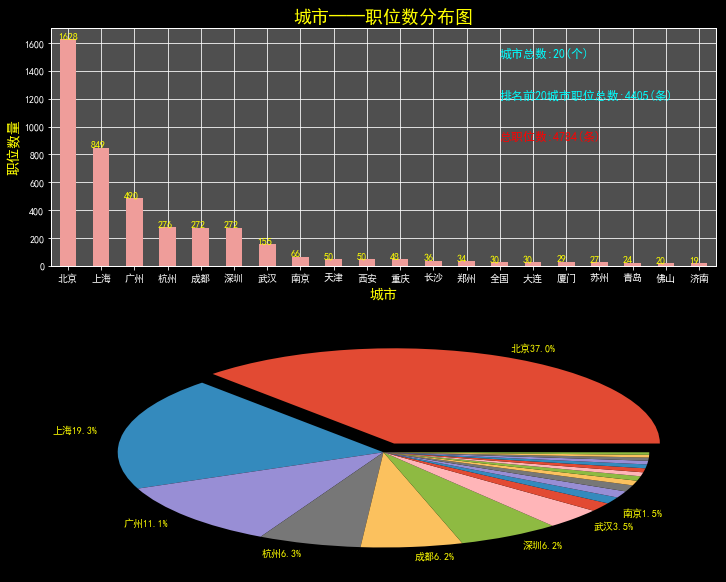

In [196]:
# 设置视图画布1
fig1 = plt.figure(figsize=(10, 8),facecolor = 'black') 
# 在视图1中设置子图1,背景色灰色，透明度0.3(figure.add_subplot 和plt.suplot都行)
ax1 = fig1.add_subplot(2,1,1,facecolor='#4f4f4f',alpha=0.3)
plt.tick_params(colors='white')#设置轴的颜色为白色
list_1.plot(kind='bar',rot=0,color='#ef9d9a')#画直方图图

# 设置图标题，x和y轴标题
title = plt.title('城市——职位数分布图',fontsize=18,color='yellow')# 设置标题
xlabel = plt.xlabel('城市',fontsize=14,color='yellow')# 设置X轴轴标题
ylabel = plt.ylabel('职位数量',fontsize=14,color='yellow')# 设置Y轴轴标题

# 设置说明，位置在图的右上角
text1 = ax1.text(13,1500,'城市总数:20(个)',fontsize=12, color='cyan')# 设置说明，位置在图的右上角
text2 = ax1.text(13,1200,'排名前20城市职位总数:4405(条)',fontsize=12, color='cyan')
text3 = ax1.text(13,900,'总职位数:4784(条)',fontsize=12, color='red')

# 添加每一个城市的坐标值
for i in range(20):
    ax1.text(i-0.3,list_1[i],str(list_1[i]),color='yellow')

# 设置子图2，是位于子图1下面的饼状图
ax2 = fig1.add_subplot(2,1,2)
# 为了方便，显示前8个城市的城市名称和比例、其余的不显示，用空字符列表替代。
x = list_1.values # x是数值列表，pie图的比例根据数值占整体的比例而划分
label_list = []# label_list是构造的列表，装的是前8个城市的名称+职位占比。
for i in range(8):
    t = list_1[i]/list_1.sum()*100
    city = list_1.index[i]
    percent = str('%.1f%%'%t)
    label_list.append(city+percent)

# labels参数原本是与数值对应的标签列表，此处20个城市过多，所以只取了前8个城市显示。
# explode即饼图中分裂的效果explode=（0.1，1，1，。。）表示第一块图片显示为分裂效果
labels = label_list + ['']*12
explode = tuple([0.1]+[0]*19)
plt.pie(x,explode=explode,labels=labels,textprops={'color':'yellow'})

fig1.tight_layout(pad=0.4, w_pad=4.0, h_pad=3.0)# 避免两个子图重叠

【研究结论】可以看见，曲线呈现长尾特征。北上广3个城市占据了超过60%以上的职位。其中北京占据了近三分之一的运营工作岗位。 上海位居第二。杭州、成都、深圳3个城市并驾齐驱。杭州有阿里巴巴、蘑菇街等电商带动互联网文化发展，深圳背靠腾讯，成都近些年则依靠电子游戏、电子科技快速崛起。南京的互联网发展远不如上述城市，甚至落后于武汉，说明南京的产业仍旧相对保守，需要创新型的互联网企业注入生机。

3. 学历-实习数量及分布

In [64]:
newDf['job_academic'].value_counts() # 统计学历下各个字段的累计和

本科    2723
不限    1253
大专     733
硕士      75
Name: job_academic, dtype: int64

([<matplotlib.patches.Wedge at 0x1b70e908>,
 [Text(-0.258787,1.17176,'本科'),
  Text(-0.369771,-1.14161,'不限'),
  Text(1.00385,-0.657483,'大专'),
  Text(1.19854,-0.059078,'硕士')],
 [Text(-0.150959,0.683529,'56.9%'),
  Text(-0.2157,-0.665938,'26.2%'),
  Text(0.585579,-0.383532,'15.3%'),
  Text(0.699151,-0.0344622,'1.6%')])

(-1.1294926839546549,
 1.206039282644631,
 -1.2143175165755036,
 1.2168948100927477)

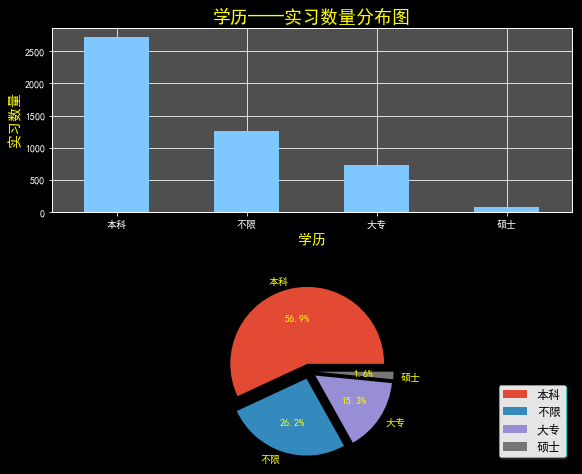

In [188]:
# 现在，可以进行下一步可视化了，还是做2张图：直方图和饼图。通过这两张图可以直观地看到这么多职位对不同学历的要求占比。
fig2 = plt.figure(figsize=(8, 6.5),facecolor = 'black')

fig2.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)

ax2_1 = fig2.add_subplot(2,1,1,facecolor='#4f4f4f',alpha=0.3)
plt.tick_params(colors='white')
newDf['job_academic'].value_counts().plot(kind = 'bar',rot = 0,color='#7fc8ff')
title = plt.title('学历——实习数量分布图',fontsize = 18,color = 'yellow')
xlabel = plt.xlabel('学历',fontsize = 14,color = 'yellow')
ylabel = plt.ylabel('实习数量',fontsize = 14,color = 'yellow')
plt.grid(True)

# 设置子图2
ax2_2 = fig2.add_subplot(2,1,2)

x2 = newDf['job_academic'].value_counts().values
labels = list(newDf['job_academic'].value_counts().index[:4])
explode = tuple([0.1,0.1,0.1,0.1])
plt.pie(x2,explode=explode,labels=labels,autopct='%1.1f%%',textprops={'color':'yellow'})
plt.axis('equal')# 显示为等比例圆形

# 设置图例，方位为右下角
legend = ax2_2.legend(loc='lower right',shadow=True,fontsize=12,edgecolor='cyan')

fig2.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)

【研究结论】从直方图和饼图中可以明显看出运营岗位对学历的要求不严苛，本科学历占到56.9%，而研究生学历只占到1.6%。这也侧面说明，运营岗位偏实践，轻理论。

4. 学历-平均日薪

在这一部分，我们想要得到的是不同学历字段下的平均日薪  
首先，我们需要构造一个DataFrame用于存放 newDf['job_academic'] 和 newDf['job_academic'] 这两列元素；  
其次，我们需要把这两列元素用groupby进行分组,分组后可以求得学历下各个字段的平均日薪的计数；  
对分组后的grouped用mean()方法，可以统计分组内各项的平均值。  

In [3]:
# 因为误操作了，所以重新读入一次df（之前的步骤中储存过csv和xlsx格式的文件）
newDf = pd.read_excel('newDf.xlsx',header=0, names=None, parse_cols=None)

In [116]:
df_academic_money=pd.DataFrame(data={'学历':newDf['job_academic'],'平均日薪':newDf['job_academic']})
df_academic_money.info()
grouped_academic_money = df_academic_money['平均日薪'].groupby(df_academic_money['学历'])
grouped_academic_money.mean()

# 之前这一步跑代码的时候报错“DataError: No numeric types to aggregate”，因为平均日薪字符型为str，不是float，这次跑不知道为什么没报错
# 如果报错，可以用以下代码转换值类型
# 构造一个listi存放转化后float型的‘平均日薪’
# import re
# pattern = re.compile('([0-9]+)')
# listi = []
# for i in range(len(newDf['average'])):
#     item = newDf['average'].iloc[i].strip()
#     result = re.findall(pattern,item)
#     listi.append(float(result[0]))
# 将newDf['average']列替换掉,同时新增一列'df_平均日薪'做备用。
# newDf['average'] = listi
# df['df_平均日薪'] = newDf['average']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 2 columns):
学历      4784 non-null object
平均日薪    4784 non-null float64
dtypes: float64(1), object(1)
memory usage: 74.8+ KB


学历
不限    135.731844
大专    134.926330
本科    140.172237
硕士    138.253333
Name: 平均日薪, dtype: float64

In [120]:
# 可以看到数据大小排列很乱，而且小数点很多，需要再处理一下
# sort_values()方法可以对值进行排序，默认按照升序，round（2）表示小数点后保留2位小数。
result = grouped_academic_money.mean().sort_values(ascending=False).round(2)
result

学历
本科    140.17
硕士    138.25
不限    135.73
大专    134.93
Name: 平均日薪, dtype: float64

Text(140.17,0,'140')

Text(138.25,1,'138')

Text(135.73,2,'135')

Text(134.93,3,'134')

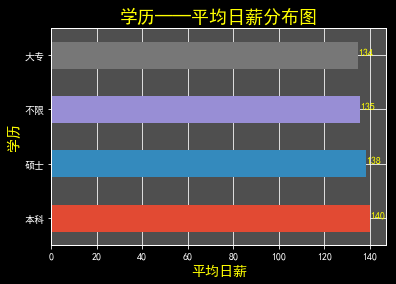

In [123]:
# 现在开始可视化（barh）
matplotlib.style.use('ggplot')
fig3 = plt.figure(3,facecolor = 'black')
ax3 = fig3.add_subplot(1,1,1,facecolor='#4f4f4f',alpha=0.3)
result.plot(kind='barh',rot=0)

#设置标题、x轴、y轴的标签文本
title = plt.title('学历——平均日薪分布图',fontsize = 18,color = 'yellow')
xlabel= plt.xlabel('平均日薪',fontsize = 14,color = 'yellow')
ylabel = plt.ylabel('学历',fontsize = 14,color = 'yellow')

#添加值标签
list3 = result
for i in range(len(list3)):
    ax3.text(list3[i],i,str(int(list3[i])),color='yellow')

#设置轴刻度文字颜色为白色
plt.tick_params(colors='white')

【研究结论】通过图表，我们可以直观地看到，运营岗位学历和实习日薪没有显著关系。这个信息对研究生来说不太美妙。

5. 实习城市-平均日薪

In [143]:
# 和上面的套路一样，先构造一个DataFrame，包含两列，一列是“平均日薪”一列是“实习城市”
df_position_money=pd.DataFrame(data={'实习城市':newDf['job_position'],'平均日薪':newDf['average']})
df_position_money.info()
grouped_position_money = df_position_money['平均日薪'].groupby(df_position_money['实习城市'])
grouped_position_money.mean() # 查看对20个城市分组后，各个城市实习日薪的平均值
grouped_position_money.count().sum()# 查看对20个城市分组后筛选出的平均日薪样本数

#新增一个平均日薪值
salary = pd.Series(data = {'平均值':newDf['average'].mean()})
result_1 = grouped_position_money.mean().append(salary)
#sort_values()方法可以对值进行排序，默认按照升序，round（2）表示小数点后保留2位小数。
result_1.sort_values(ascending=False).round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 2 columns):
实习城市    4784 non-null object
平均日薪    4784 non-null float64
dtypes: float64(1), object(1)
memory usage: 74.8+ KB


实习城市
,天津                                          110.000000
三亚                                           125.000000
上海                                           142.826266
上海,北京                                         75.000000
上海,南京                                        130.000000
上海,厦门                                        175.000000
上海,深圳                                        115.000000
东莞                                           106.500000
东莞,广州,梅州,北京                                  125.000000
中卫                                           212.500000
中山                                           166.666667
临沂                                           125.000000
乌鲁木齐                                         125.000000
佛山                                           125.750000
佛山,南宁,珠海                                     175.000000
保定                                           125.000000
全国                                           141.033333
兰州                                         

4784

成都,深圳                                        250.00
中卫                                           212.50
昆山                                           188.89
北京,大连,济南,青岛,上海,西安                            175.00
南通                                           175.00
佛山,南宁,珠海                                     175.00
济南,青岛                                        175.00
上海,厦门                                        175.00
中山                                           166.67
北京,成都                                        160.00
北京,南京                                        150.00
襄阳                                           150.00
长春                                           150.00
滨江                                           150.00
北京                                           149.43
海淀                                           147.50
深圳                                           147.16
郑州                                           145.16
无锡                                           142.86
上海          

Text(-0.5,250,'250')

Text(0.5,212.5,'212')

Text(1.5,188.89,'188')

Text(2.5,175,'175')

Text(3.5,175,'175')

Text(4.5,175,'175')

Text(5.5,175,'175')

Text(6.5,175,'175')

Text(7.5,166.67,'166')

Text(8.5,160,'160')

Text(9.5,150,'150')

Text(10.5,150,'150')

Text(11.5,150,'150')

Text(12.5,150,'150')

Text(13.5,149.43,'149')

Text(14.5,147.5,'147')

Text(15.5,147.16,'147')

Text(16.5,145.16,'145')

Text(17.5,142.86,'142')

Text(18.5,142.83,'142')

Text(19.5,141.67,'141')

Text(20.5,141.67,'141')

Text(21.5,141.03,'141')

Text(22.5,138.54,'138')

Text(23.5,138.18,'138')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

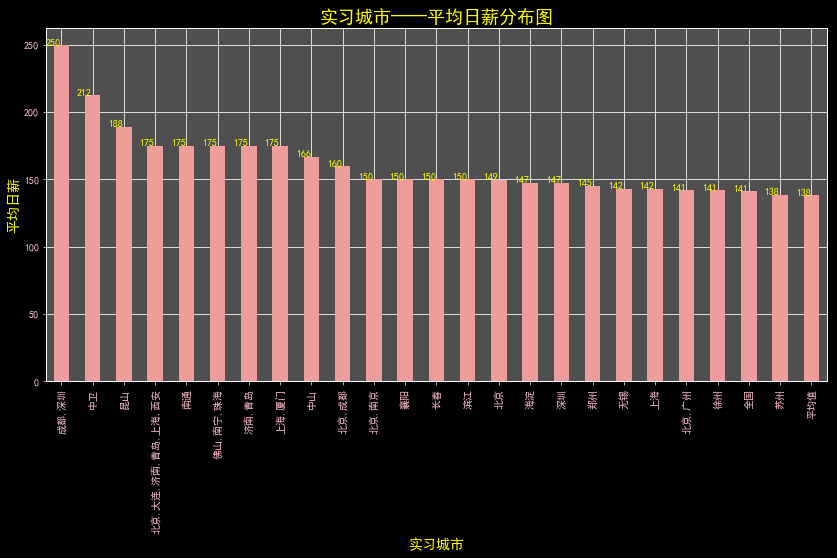

In [185]:
# 由于样本量较大，我们取前25条数据进行可视化（因为平均值正好在第25条）

result_2=result_1.sort_values(ascending=False).round(2)[:25]

fig4 = plt.figure(figsize=(14, 6.5),facecolor = 'black')
ax4 = fig4.add_subplot(1,1,1,facecolor='#4f4f4f',alpha=0.3)
result_2.plot(kind='bar',rot=30, color='#ef9d9a')

# 设置图标题，x和y轴标题
title = plt.title('实习城市——平均日薪分布图',fontsize=18,color='yellow')
xlabel = plt.xlabel('实习城市',fontsize=14,color='yellow')
ylabel = plt.ylabel('平均日薪',fontsize=14,color='yellow')

# 添加每一个城市的坐标值
list4 = result_2.values
for i in range(len(list4)):
    ax4.text(i-0.5,list4[i],int(list4[i]),color='yellow')

# 设置轴刻度文字颜色为粉色
plt.tick_params(colors='pink')

# 调整x轴标签方向
import pylab as pl
pl.xticks(rotation=90)

【研究结论】由于“实习城市”相关数据没有清洗得很干净，一条数据中如果存在超过两个实习城市，那么它就被独自归为一类。例如实习城市是“成都”和“深圳”，那么它既不属于“成都”，也不属于“深圳”，而是独立存在。但是，因为此类数据样本量较少，我们可以忽略。从直方图中可以看出，北京和上海并不是实习日薪最高的城市，但是其日薪还是高于平均值。在排名前20的城市中，运营实习的平均日薪相差不大。令人意外的是杭州运营岗位的实习日薪低于全国平均值。

6. 到岗时间&实习期

In [160]:
newDf['job_week'].value_counts()
# 实习僧网站显示的实习期可以长达几百个月，所以出现超过12个月和极端值的情况是正常的
newDf['job_time'].value_counts()[:10]

5    2483
4     906
3     738
1     335
6     262
2      54
7       6
Name: job_week, dtype: int64

4     2062
7      528
12     504
6      415
3      410
5      308
8      195
9      116
10      79
11      54
Name: job_time, dtype: int64

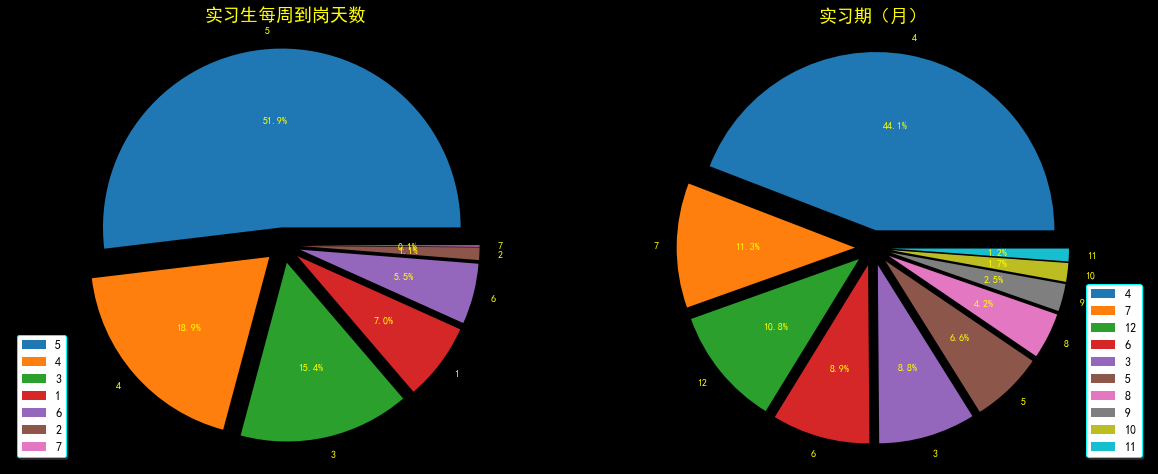

In [8]:
# 这次画两个饼图
fig5 = plt.figure(figsize=(16, 6.5),facecolor = 'black')

# 设置子图1
ax5_1 = fig5.add_subplot(1,2,1)
ax5_1.set_title('实习生每周到岗天数',fontsize=18,color='yellow')# 设置子图标题
x5_1 = newDf['job_week'].value_counts().values
labels = list(newDf['job_week'].value_counts().index[:7])
explode = tuple([0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.pie(x5_1,explode=explode,labels=labels,autopct='%1.1f%%',textprops={'color':'yellow'})
plt.axis('equal')# 显示为等比例圆形

# 设置图例
legend = ax5_1.legend(loc='lower left', shadow=True,fontsize=12,edgecolor='cyan')

# 设置子图2
ax5_2 = fig5.add_subplot(1,2,2)
ax5_2.set_title('实习期（月）',fontsize=18,color='yellow')# 设置子图标题
x5_2 = newDf['job_time'].value_counts()[:10].values
labels = list(newDf['job_time'].value_counts()[:10].index[:10])
explode = tuple([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.pie(x5_2,explode=explode,labels=labels,autopct='%1.1f%%',textprops={'color':'yellow'})
plt.axis('equal')# 显示为等比例圆形

# 设置图例
legend = ax5_2.legend(loc='lower right',shadow=True,fontsize=12,edgecolor='cyan')

fig5.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)

【研究结论】观察饼图可以发现，51.9%的企业要求实习生每周到岗5天，相当于全职工作。90%以上的企业要求实习期4个月以上，1-2个月的短期实习几乎是不存在的。由此可见，运营实习对学生的实习时长提出了近乎苛刻的要求。兼顾学业与实习是比较困难的事情。

7. 岗位要求词云图

In [2]:
# 开始分析职位信息了。
# 先读取newDf['job_detail']的信息，存入txt文件
import pandas as pd
job_detail_1=pd.read_csv('shixiseng_find_intern_list20190706.txt',
                 sep = "\t",  lineterminator='\n', names = ['detail_url', 'job_name', 'job_money', 
                 'job_position', 'job_academic', 'job_week', 'job_time', 'job_detail'], encoding='gb18030')
job_detail=job_detail_1['job_detail']
job_detail.to_csv("job_detail.txt", index=False, encoding='gb18030')

In [3]:
# pip install jieba wordcloud matplotlib
import jieba
# 导入用于用于制作词云图的wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from collections import defaultdict
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [4]:
# 导入停用词
filename = 'homework-data/stopwords.txt'
stopwords = {}
f = open(filename, 'r', encoding = 'UTF-8')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line] = 1
    line = f.readline().rstrip()
f.close()

In [5]:
# 根据几次试验，加入一些停用词
adding_stopwords = [u'我们', u'要', u'地', u'有', u'这', u'人',
                    u'发展',u'建设',u'加强',u'继续',u'对',u'等',
                    u'推进',u'工作',u'增加', u'任职', u'要求', u'需要',
                    u'优先', u'工作', u'职责', u'岗位', u'实习',
                    u'考虑', u'公司', u'能力', u'及', u"'，", u'、', u'\xa0', u'；', u'。', u'\n' ]
for s in adding_stopwords: stopwords[s]=10

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.588 seconds.
Prefix dict has been built succesfully.


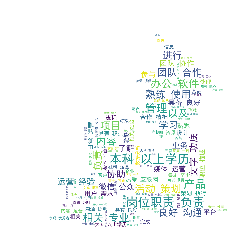

In [6]:
# 第一步，读取文本
job_detail = open('job_detail.txt','r',encoding='gb18030').read()
# 第二步，把文本剪开
seg_list = jieba.cut(job_detail, cut_all=False)
seg_list = [i for i in seg_list if i not in stopwords]
# 第三步，以空格拼接起来
job_detail = r' '.join(seg_list)
# 第四步，生成词云
wc = WordCloud(
    font_path='simhei.ttf',     #字体路劲
    background_color='white',   #背景颜色
    width=1000,
    height=600,
    max_font_size=50,            #字体大小
    min_font_size=10,
    mask=plt.imread('C:/Users/Administrator/Desktop/student.jpg'),  #背景图片
    max_words=1000,
)
wc.generate(job_detail)
wc.to_file('运营能力要求.png')    #图片保存
# 第五步，显示图片
plt.figure('运营能力要求')   #图片显示的名字
plt.imshow(wc)
plt.axis('off')        #关闭坐标
plt.show()

In [7]:
# 看看哪些词出现频次高
wordfreq = defaultdict(int)
for i in seg_list:
    wordfreq[i] +=1
wordfreq = [[i, wordfreq[i]] for i in wordfreq]

wordfreq.sort(key= lambda x:x[1], reverse = True )
u"、 ".join([ i[0] + u'（' + str(i[1]) +u'）' for i in wordfreq ])

'，（51503）、  （28265）、 运营（6888）、 负责（5071）、 内容（4860）、 用户（4102）、 ）（3765）、 相关（3661）、 强（3576）、 活动（3457）、 （（3397）、 沟通（3377）、 与（3377）、 产品（3349）、 你（2858）、 进行（2766）、 并（2762）、 策划（2743）、 经验（2707）、 媒体（2678）、 协助（2595）、 平台（2579）、 团队（2570）、 能（2560）、 新（2501）、 良好（2357）、 数据（2354）、 专业（2310）、 岗位职责（2200）、 完成（2196）、 具有（2022）、 分析（2014）、 】（1988）、 【（1985）、 学习（1961）、 或（1910）、 互联网（1884）、 提供（1881）、 推广（1859）、 可（1828）、 一定（1759）、 具备（1742）、 日常（1716）、 维护（1712）、 者（1694）、 文案（1693）、 视频（1647）、 以上（1609）、 管理（1607）、 为（1569）、 熟悉（1569）、 行业（1520）、 以上学历（1501）、 微信（1493）、 客户（1490）、 需求（1466）、 号（1438）、 编辑（1433）、 时间（1432）、 了解（1425）、 其他（1423）、 项目（1411）、 每周（1399）、 执行（1391）、 天（1389）、 优化（1369）、 培训（1335）、 软件（1307）、 本科（1306）、 撰写（1306）、 较（1280）、 社群（1280）、 ！（1277）、 使用（1276）、 合作（1264）、 根据（1243）、 热爱（1223）、 至少（1216）、 文字（1192）、 熟练（1177）、 优秀（1153）、 职位（1149）、 信息（1148）、 公众（1142）、 可以（1135）、 责任心（1126）、 善于（1123）、 参与（1122）、 整理（1067）、 个（1051）、 能够（1047）、 服务（1025）、 办公（1014）、 提升（1012）、 福利（982）、 好（973）、 成长（963）、 较强（963）、 市场（958）、 会（925）、 处理（920）、 营销（913）、 销售

【研究结论】观察词云图可以发现，运营岗位对实习生沟通、活动策划、文字功底、团队协作、媒体运营、数据分析等能力的要求较高。若是以后想往运营方向发展，需要着重提升这些能力。

# 五、总结

        通过以上分析，总结得出：（1）运营实习生的平均日薪不高；（2）实习岗位集中在北上广深杭这5个城市；（3）运营对实习生学历要求宽松，能力至上；（4）实习薪资和实习城市没有显著的关系，北京、上海、深圳等大城市的实习薪资与全国平均值基本持平；（4）大多数企业要求实习生能全职实习，并且实习期在4个月以上。（5）运营岗位最为看重的能力是：沟通、活动策划、文字功底、团队协作、媒体运营等。  
        如果进一步分析的话，可以将数据更多样化的两两组合，进行交叉分析。此外，利用本项目的代码，可以爬取不同的运营岗位数据，如活动运营、产品运营、内容运营等，可以进一步分析运营岗位内部的差异。当然，也可以将运营岗位和其他跨度较大的岗位，如数据分析岗，进行对比分析，认识两者间的差距。  
        最后，遗憾的是，由于本人能力有限，对matplotlib一些参数的设置不熟悉，导致本项目中的可视化图片不太美观，还需要继续加强学习。